In [16]:
import pandas as pd

In [27]:
import requests

CLIENT_ACCESS_TOKEN = "pTXMqwbdkhkROKmtMrxmI0KgAb-TS0CPYk8nCHTq1x70lc42GlvkoN1YJjNOakDW"

BASE_URI = "https://api.genius.com"

def _get(path, params=None, headers=None):
    url = 'http://genius.com/Ed-sheeran-thinking-out-loud-lyrics'
    #url = '/'.join([BASE_URI, path])

    token = "Bearer {}".format(CLIENT_ACCESS_TOKEN)

    if headers:
        headers['Authorization'] = token
    else:
        headers = {"Authorization": token}

    response = requests.get(url=url, params=params, headers=headers)
    response.raise_for_status()

    return response.json()



In [7]:
def get_artist_songs(artist_id):

    current_page = 1
    next_page = True
    songs = []

    while next_page:

        path = "artists/{}/songs/".format(artist_id)
        params = {'page': current_page}
        data = _get(path=path, params=params)

        page_songs = data['response']['songs']

        if page_songs:
            songs += page_songs
            current_page += 1
        else:
            next_page = False

    return songs

### To find given song:
#### spreadsheet with artist, song title
    *spaces as dashes artist_name.replace(' ', '-')
    *http://genius.com/"artist_name"-"song_name"-lyrics
    *return data
    *add feature - number of unique words
    *add feature - repitition
    

In [30]:
from bs4 import BeautifulSoup

In [34]:
def scrape_lyrics(url):

    response = requests.get(url)
    html = response.text

    soup = BeautifulSoup(html, 'html.parser')

    lyrics = soup.find(name="lyrics")
 

    lyrics_text = ", ".join([lyric for lyric in lyrics.stripped_strings])
    return lyrics_text

In [35]:
url = 'http://genius.com/Ed-sheeran-thinking-out-loud-lyrics'
#url = song['url']
lyrics = scrape_lyrics(url)
print lyrics

[Verse 1], When your legs don't work like they used to before, And I can't sweep you off of your feet, Will your mouth still remember the taste of my love?, Will your eyes still smile from your cheeks?, And darling I will be loving you till we're seventy, And baby, my heart could still fall as hard at twenty-three, And I'm thinking about how, [Pre-Chorus 1], People fall in love in mysterious ways, Maybe just the touch of a hand, Well me, I fall in love with you every single day, I just wanna tell you I am, [Chorus], So honey, now, take me into your loving arms, Kiss me under the light of a thousand stars, Place your head on my beating heart, I'm thinking out loud, And maybe we found love right where we are, [Verse 2], When my hair's all but gone and my memory fades, And the crowds don't remember my name, When my hands don't play the strings the same way, I know you will still love me the same, Cause honey your soul could never grow old, it's evergreen, And baby, your smile's forever in

In [45]:
artist= 
url = 'http://genius.com/Ed-sheeran-thinking-out-loud-lyrics'
#url = song['url']
lyrics = scrape_lyrics(url)
print lyrics

[Verse 1], When your legs don't work like they used to before, And I can't sweep you off of your feet, Will your mouth still remember the taste of my love?, Will your eyes still smile from your cheeks?, And darling I will be loving you till we're seventy, And baby, my heart could still fall as hard at twenty-three, And I'm thinking about how, [Pre-Chorus 1], People fall in love in mysterious ways, Maybe just the touch of a hand, Well me, I fall in love with you every single day, I just wanna tell you I am, [Chorus], So honey, now, take me into your loving arms, Kiss me under the light of a thousand stars, Place your head on my beating heart, I'm thinking out loud, And maybe we found love right where we are, [Verse 2], When my hair's all but gone and my memory fades, And the crowds don't remember my name, When my hands don't play the strings the same way, I know you will still love me the same, Cause honey your soul could never grow old, it's evergreen, And baby, your smile's forever in

In [20]:
Songs15 = pd.read_csv('Songs_2015.csv')

In [21]:
Songs15.describe()

,1
count,99.000000
mean,51.000000
std,28.722813
min,2.000000
25%,26.500000
50%,51.000000
75%,75.500000
max,100.000000


In [43]:
import nltk

#stop_words = set(nltk.corpus.stopwords.words('english'))
#stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '/']) 

all_tokens = nltk.word_tokenize(lyrics)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
fdist = nltk.FreqDist(all_tokens)
print sum([fdist[word] for word in lyrics])

8


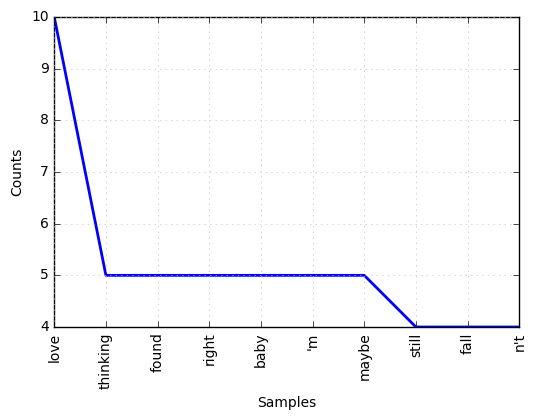

In [44]:

fdist.plot(10)